In [ ]:
import pandas as pd
songs_df = pd.read_csv('final_lyrics_cleaned_2020-2024.csv')
songs_df = songs_df[['Year', 'Title', 'Artist', 'Rank', 'lyrics_cleaned']]
songs_df

,Year,Title,Artist,Rank,lyrics_cleaned
0,2020,"""Blinding Lights""",The Weeknd,1,Yeah Ive been tryna call Ive been on my own f...
1,2020,"""Circles""",Post Malone,2,Oh oh oh Oha oh oh Oha oh oh oh oh We couldnt...
2,2020,"""The Box""",Roddy Ricch,3,Pullin out the coupe at the lot Told em fuck ...
3,2020,"""Don't Start Now""",Dua Lipa,4,If you dont wanna see me Did a full oneeighty...
4,2020,"""Rockstar""",DaBaby featuring Roddy Ricch,5,Woo woo I pull up like How you pull up Baby H...
...,...,...,...,...,...
495,2024,"""Bulletproof""",Nate Smith,96,Usually these ol neon lights Are pretty good ...
496,2024,"""Fe!n""",Travis Scott featuring Playboi Carti,97,Just come outside for the night Yeah Take you...
497,2024,"""The Painter""",Cody Johnson,98,She talks about the future like shes flippin ...
498,2024,"""Down Bad""",Taylor Swift,99,Did you really beam me up In a cloud of spark...


In [ ]:
songs_df_full = pd.read_csv('all_songs_cleaned_1959-2024.csv')
songs_df_full.columns

Index(['Unnamed: 0.2', 'Album', 'Album URL', 'Artist', 'Featured Artists',
       'Lyrics', 'Media', 'Rank', 'Release Date', 'Song Title', 'Song URL',
       'Writers', 'Year', 'Verbs', 'Nouns', 'Adverbs', 'Corpus', 'Word Counts',
       'Unique Word Counts', 'Unnamed: 0.1', 'Unnamed: 0', 'Cleaned_Title',
       'Cleaned_Artist', 'link', 'lyrics'],
      dtype='object')

In [ ]:
songs_df_full = songs_df_full[['Year',
                               'Song Title',
                               'Album',
                               'Artist',
                               'Rank',
                               'Lyrics']]
songs_df_full

,Year,Song Title,Album,Artist,Rank,Lyrics
0,1959.0,The Battle Of New Orleans,Battle of New Orleans,Johnny Horton,1,In 1814 we took a little trip Along with Colo...
1,1959.0,Mack The Knife,That’s All,Bobby Darin,2,"Oh the shark, babe Has such teeth, dear And he..."
2,1959.0,Personality,“Mr Personality’s” 15 Big Hits,Lloyd Price,3,Over and over I tried to prove my love to you ...
3,1959.0,Venus,The Greatest Hits Of Frankie Avalon,Frankie Avalon,4,"Hey, Venus! Oh, Venus! Venus, if you will Ple..."
4,1959.0,Lonely Boy,Paul Anka Sings His Big 15,Paul Anka,5,I'm just a lonely boy Lonely and blue I'm all ...
...,...,...,...,...,...,...
6408,2024.0,"""Bulletproof""",NaN,Nate Smith,96,Usually these ol neon lights Are pretty good ...
6409,2024.0,"""Fe!n""",NaN,Travis Scott featuring Playboi Carti,97,Just come outside for the night Yeah Take you...
6410,2024.0,"""The Painter""",NaN,Cody Johnson,98,She talks about the future like shes flippin ...
6411,2024.0,"""Down Bad""",NaN,Taylor Swift,99,Did you really beam me up In a cloud of spark...


In [ ]:
genre_df = pd.read_csv('train.csv')

In [ ]:
genre_df

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290180,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [ ]:
genre_df['Genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'R&B', 'Folk', 'Electronic',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

In [ ]:
# Step 1: Vectorize lyrics

all_lyrics = pd.concat([songs_df['lyrics_cleaned'], genre_df['Lyrics']])

all_lyrics_clean = all_lyrics.fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)
tfidf_matrix = tfidf.fit_transform(all_lyrics_clean)

songs_tfidf = tfidf_matrix[:len(songs_df)]
genre_tfidf = tfidf_matrix[len(songs_df):]

In [ ]:
# Step 2: Clustering Songs_df (Optional Step)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = genre_df['Genre'].nunique()

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
songs_clusters = kmeans.fit_predict(songs_tfidf)

sil_score = silhouette_score(songs_tfidf, songs_clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.026754135710366507


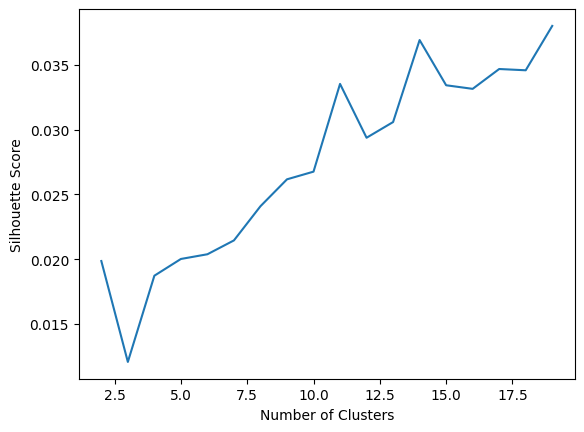

In [ ]:
import matplotlib.pyplot as plt
scores = []
cluster_range = range(2, 20)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(songs_tfidf)
    score = silhouette_score(songs_tfidf, clusters)
    scores.append(score)

plt.plot(cluster_range, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:

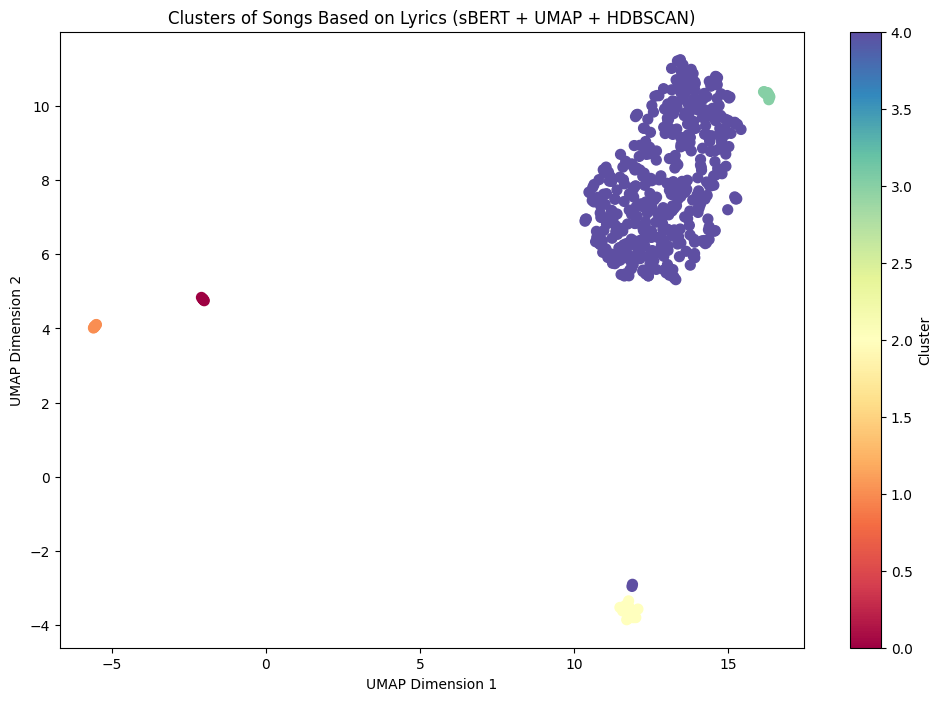

In [ ]:
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt

# 1. Sentence-BERT embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
songs_df['lyrics_cleaned'] = songs_df['lyrics_cleaned'].fillna('')
embeddings = model.encode(songs_df['lyrics_cleaned'], show_progress_bar=True)

# Step 2: Reduce dimensions with cosine-aware UMAP
reducer = umap.UMAP(n_components=10, metric='cosine', random_state=42)
reduced_embeddings = reducer.fit_transform(embeddings)

# Step 3: Cluster reduced embeddings with HDBSCAN (euclidean)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,
                            metric='euclidean',
                            cluster_selection_method='eom')

cluster_labels = clusterer.fit_predict(reduced_embeddings)

# 4. Add labels to DataFrame
songs_df['cluster'] = cluster_labels

# 5. Visualization (optional)
reducer_2d = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer_2d.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='Spectral', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters of Songs Based on Lyrics (sBERT + UMAP + HDBSCAN)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [ ]:
# Step 3: Split Genre_df by Genre for Comparison
# Create a dictionary of genre groups
genre_groups = {}

for genre in genre_df['Genre'].unique():
    genre_groups[genre] = genre_tfidf[genre_df['Genre'] == genre]

In [ ]:
# Step 4: Compare Songs_df Songs to Genre Groups
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Prepare storage for predictions
predicted_genres = []

# Iterate through each song in songs_df
for song_vec in songs_tfidf:
    similarities = {}

    for genre, genre_matrix in genre_groups.items():
        # Compute cosine similarity to all songs in this genre group
        similarity_scores = cosine_similarity(song_vec, genre_matrix)
        # Average similarity to the genre group
        avg_similarity = np.mean(similarity_scores)

        similarities[genre] = avg_similarity

    # Choose the genre with the highest similarity
    best_genre = max(similarities, key=similarities.get)
    predicted_genres.append(best_genre)

# Add predictions to your songs_df
songs_df['predicted_genre'] = predicted_genres

In [ ]:
songs_df['predicted_genre']

,predicted_genre
0,R&B
1,R&B
2,Hip-Hop
3,Hip-Hop
4,Hip-Hop
...,...
495,Hip-Hop
496,Hip-Hop
497,Hip-Hop
498,Hip-Hop


In [ ]:
# Supervised Learning approach:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split on genre_df
X_train, X_test, y_train, y_test = train_test_split(genre_tfidf, genre_df['Genre'], test_size=0.2, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict genres for songs_df
songs_df['predicted_genre_sl'] = clf.predict(songs_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       399
  Electronic       1.00      0.01      0.01       427
        Folk       0.49      0.03      0.06      1733
     Hip-Hop       0.33      0.01      0.02       457
       Indie       0.94      0.02      0.03      1734
        Jazz       0.74      0.45      0.56      2773
       Metal       0.68      0.42      0.52      4059
         Pop       0.69      0.68      0.69     21577
         R&B       1.00      0.00      0.01       516
        Rock       0.60      0.80      0.69     24362

    accuracy                           0.64     58037
   macro avg       0.65      0.24      0.26     58037
weighted avg       0.65      0.64      0.61     58037



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
songs_df['predicted_genre_sl']

,predicted_genre_sl
0,Pop
1,Pop
2,Pop
3,Pop
4,Pop
...,...
495,Pop
496,Pop
497,Rock
498,Metal


In [ ]:
import joblib

# Example: Save the trained model (clf could be LogisticRegression, SVC, XGBClassifier, etc.)
joblib.dump(clf, 'trained_model_lr.pkl')

['trained_model_lr.pkl']

In [ ]:
filename = 'trained_model_lr.pkl'
joblib.dump(clf, filename)

# Confirm it exists
import os
print(f"Model saved? {'Yes' if os.path.exists(filename) else 'No'}")

Model saved? Yes


In [ ]:
from google.colab import files
files.download('trained_model_lr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Supervised Learning (different model)
from sklearn.svm import LinearSVC

clf_SVC = LinearSVC(max_iter=10000, random_state=42)
clf_SVC.fit(X_train, y_train)

y_pred = clf_SVC.predict(X_test)
print(classification_report(y_test, y_pred))

songs_df['predicted_genre_svc'] = clf_SVC.predict(songs_tfidf)
songs_df['predicted_genre_svc']

              precision    recall  f1-score   support

     Country       0.27      0.01      0.02       399
  Electronic       0.68      0.04      0.08       427
        Folk       0.52      0.10      0.17      1733
     Hip-Hop       0.38      0.04      0.06       457
       Indie       0.62      0.08      0.14      1734
        Jazz       0.70      0.50      0.58      2773
       Metal       0.67      0.46      0.55      4059
         Pop       0.68      0.70      0.69     21577
         R&B       0.38      0.01      0.02       516
        Rock       0.63      0.78      0.69     24362

    accuracy                           0.65     58037
   macro avg       0.55      0.27      0.30     58037
weighted avg       0.64      0.65      0.63     58037



,predicted_genre_svc
0,Pop
1,Pop
2,Pop
3,Pop
4,Pop
...,...
495,Pop
496,Pop
497,Rock
498,Metal


In [ ]:
joblib.dump(clf_SVC, 'trained_model_SVC.pkl')
filename = 'trained_model_SVC.pkl'
joblib.dump(clf_SVC, filename)

# Confirm it exists
print(f"Model saved? {'Yes' if os.path.exists(filename) else 'No'}")

files.download('trained_model_SVC.pkl')

Model saved? Yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Supervised Learning (different model)
from sklearn.naive_bayes import MultinomialNB

clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

y_pred = clf_NB.predict(X_test)
print(classification_report(y_test, y_pred))

songs_df['predicted_genre_nb'] = clf_NB.predict(songs_tfidf)
songs_df['predicted_genre_nb']

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       399
  Electronic       0.00      0.00      0.00       427
        Folk       0.45      0.01      0.01      1733
     Hip-Hop       0.00      0.00      0.00       457
       Indie       0.20      0.00      0.01      1734
        Jazz       0.78      0.08      0.15      2773
       Metal       0.73      0.16      0.27      4059
         Pop       0.69      0.50      0.58     21577
         R&B       0.00      0.00      0.00       516
        Rock       0.51      0.86      0.64     24362

    accuracy                           0.56     58037
   macro avg       0.34      0.16      0.16     58037
weighted avg       0.58      0.56      0.51     58037



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,predicted_genre_nb
0,Pop
1,Rock
2,Pop
3,Pop
4,Pop
...,...
495,Pop
496,Pop
497,Rock
498,Pop


In [ ]:
joblib.dump(clf_NB, 'trained_model_NB.pkl')
filename = 'trained_model_NB.pkl'
joblib.dump(clf_NB, filename)

# Confirm it exists
print(f"Model saved? {'Yes' if os.path.exists(filename) else 'No'}")

files.download('trained_model_NB.pkl')

Model saved? Yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# TAKES TOO LONG TO FINISH, NOT USING IT

# # Supervised Learning (different model)
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))

# songs_df['predicted_genre_rfc'] = clf.predict(songs_tfidf)

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode genre labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and fit XGBoost classifier
clf_XGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
clf_XGB.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_encoded = clf_XGB.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict on songs_df and add predictions to the dataframe
songs_df['predicted_genre_xgb'] = le.inverse_transform(clf_XGB.predict(songs_tfidf))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

     Country       0.35      0.02      0.04       399
  Electronic       0.75      0.03      0.05       427
        Folk       0.56      0.04      0.08      1733
     Hip-Hop       0.14      0.01      0.02       457
       Indie       0.91      0.04      0.08      1734
        Jazz       0.80      0.39      0.53      2773
       Metal       0.72      0.32      0.44      4059
         Pop       0.74      0.60      0.66     21577
         R&B       0.62      0.02      0.03       516
        Rock       0.57      0.86      0.68     24362

    accuracy                           0.63     58037
   macro avg       0.61      0.23      0.26     58037
weighted avg       0.66      0.63      0.59     58037



In [ ]:
songs_df['predicted_genre_xgb']

,predicted_genre_xgb
0,Pop
1,Pop
2,Pop
3,Pop
4,Pop
...,...
495,Rock
496,Pop
497,Rock
498,Rock


In [ ]:
joblib.dump(clf_XGB, 'trained_model_XGB.pkl')
filename = 'trained_model_XGB.pkl'
joblib.dump(clf_XGB, filename)

# Confirm it exists
print(f"Model saved? {'Yes' if os.path.exists(filename) else 'No'}")

files.download('trained_model_XGB.pkl')

Model saved? Yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # Generic code where any classifer can be plugged in:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Example with SVM
# from sklearn.svm import LinearSVC

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(genre_tfidf, genre_df['Genre'], test_size=0.2, random_state=42)

# # Instantiate classifier
# clf = LinearSVC(max_iter=10000, random_state=42)

# # Train
# clf.fit(X_train, y_train)

# # Evaluate
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))

# # Predict on unlabeled data
# songs_df['predicted_genre_sl'] = clf.predict(songs_tfidf)

In [ ]:
# HyperparaYou can boost performance by running a GridSearchCV:

In [ ]:
songs_df = songs_df.drop(columns=['predicted_genre_mlp'])

In [ ]:
songs_df

,Year,Title,Artist,Rank,lyrics_cleaned,cluster,predicted_genre,predicted_genre_sl,predicted_genre_svc,predicted_genre_nb,predicted_genre_xgb
0,2020,"""Blinding Lights""",The Weeknd,1,Yeah Ive been tryna call Ive been on my own f...,4,R&B,Pop,Pop,Pop,Pop
1,2020,"""Circles""",Post Malone,2,Oh oh oh Oha oh oh Oha oh oh oh oh We couldnt...,4,R&B,Pop,Pop,Rock,Pop
2,2020,"""The Box""",Roddy Ricch,3,Pullin out the coupe at the lot Told em fuck ...,4,Hip-Hop,Pop,Pop,Pop,Pop
3,2020,"""Don't Start Now""",Dua Lipa,4,If you dont wanna see me Did a full oneeighty...,4,Hip-Hop,Pop,Pop,Pop,Pop
4,2020,"""Rockstar""",DaBaby featuring Roddy Ricch,5,Woo woo I pull up like How you pull up Baby H...,4,Hip-Hop,Pop,Pop,Pop,Pop
...,...,...,...,...,...,...,...,...,...,...,...
495,2024,"""Bulletproof""",Nate Smith,96,Usually these ol neon lights Are pretty good ...,4,Hip-Hop,Pop,Pop,Pop,Rock
496,2024,"""Fe!n""",Travis Scott featuring Playboi Carti,97,Just come outside for the night Yeah Take you...,4,Hip-Hop,Pop,Pop,Pop,Pop
497,2024,"""The Painter""",Cody Johnson,98,She talks about the future like shes flippin ...,4,Hip-Hop,Rock,Rock,Rock,Rock
498,2024,"""Down Bad""",Taylor Swift,99,Did you really beam me up In a cloud of spark...,4,Hip-Hop,Metal,Metal,Pop,Rock


In [ ]:
from google.colab import files
songs_df.to_csv('songs_genre_labeled_2020-2024.csv', index=False)
files.download('songs_genre_labeled_2020-2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_df = pd.read_csv('test.csv')
test_df

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797
...,...,...,...,...,...,...
7930,too-little-too-late,2006,amanda-marshall,Rock,Tuesday night - 7:30\nI hear a voice on the te...,23453
7931,berserker,2007,aurora-borealis,Metal,Elite forces cloaked in fur un sensitive to pa...,2724
7932,natural-born-killaz,2010,dr-dre,Hip-Hop,[Dr. Dre]\nJourney with me\nInto the mind of a...,24147
7933,wide-awake,2011,chris-cornell,Rock,You can a look a hurricane right in the eye.\n...,4150


In [ ]:
# Combine all lyrics (optional) to fit the vectorizer on more data
all_lyrics = pd.concat([genre_df['Lyrics'], test_df['Lyrics'], songs_df['lyrics_cleaned']])

# Fit TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)

all_tfidf = tfidf.fit_transform(all_lyrics.fillna(''))

# Split back into the datasets
genre_tfidf = all_tfidf[:len(genre_df)]
test_tfidf = all_tfidf[len(genre_df):(len(genre_df) + len(test_df))]
songs_tfidf = all_tfidf[-len(songs_df):]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Train on ALL of genre_df
clf_LR = LogisticRegression(max_iter=1000)
clf_LR.fit(genre_tfidf, genre_df['Genre'])

# 2. Evaluate on the separate labeled test data
y_test = test_df['Genre']            # True labels
X_test = test_tfidf                  # TF-IDF features of test_df

y_pred = clf_LR.predict(X_test)         # Predictions

print(classification_report(y_test, y_pred))

# 3. Predict genres for songs_df (unlabeled songs)
songs_df['predicted_genre_sl'] = clf_LR.predict(songs_tfidf)

              precision    recall  f1-score   support

     Country       1.00      0.00      0.00       810
  Electronic       0.00      0.00      0.00       660
        Folk       0.70      0.09      0.16       495
     Hip-Hop       0.96      0.03      0.05       960
       Indie       1.00      0.01      0.02       510
        Jazz       0.73      0.22      0.34       660
       Metal       0.68      0.55      0.61       810
         Pop       0.22      0.50      0.31      1110
         R&B       0.92      0.02      0.04       510
        Rock       0.23      0.73      0.35      1410

    accuracy                           0.29      7935
   macro avg       0.64      0.22      0.19      7935
weighted avg       0.59      0.29      0.22      7935



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 6. Save models
joblib.dump(best_clf, 'best_genre_classifier.pkl')
joblib.dump(le, 'genre_label_encoder.pkl')
joblib.dump(model, 'sentence_bert_model.pkl')

In [ ]:
import pandas as pd

from sklearn.metrics import classification_report
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Vectorize ALL lyrics together for consistent feature space
all_lyrics = pd.concat([
    songs_df['lyrics_cleaned'],  # unlabeled songs you are predicting genres for
    genre_df['Lyrics'],          # labeled genre songs
    test_df['Lyrics']    # labeled test songs
])

# Clean NaN values
all_lyrics_clean = all_lyrics.fillna('')

# Step 2: TF-IDF Vectorizer (same settings for consistency)
tfidf = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)
tfidf_matrix = tfidf.fit_transform(all_lyrics_clean)

# Step 3: Split back into respective datasets
songs_tfidf = tfidf_matrix[:len(songs_df)]
genre_tfidf = tfidf_matrix[len(songs_df):len(songs_df) + len(genre_df)]
test_tfidf = tfidf_matrix[-len(test_df):]

# Step 4: Create genre_groups from labeled genre_df
genre_groups = {}
for genre in genre_df['Genre'].unique():
    genre_matrix = genre_tfidf[genre_df['Genre'] == genre]
    genre_groups[genre] = genre_matrix

# Step 5: Predict genres for test_df using cosine similarity
predicted_genres_test = []

for song_vec in test_tfidf:
    similarities = {}

    # Compare to each genre group
    for genre, genre_matrix in genre_groups.items():
        similarity_scores = cosine_similarity(song_vec, genre_matrix)
        avg_similarity = np.mean(similarity_scores)
        similarities[genre] = avg_similarity

    # Choose the genre with the highest average similarity
    best_genre = max(similarities, key=similarities.get)
    predicted_genres_test.append(best_genre)

# Step 6: Evaluate predictions vs. true labels in test_df
true_genres_test = test_df['Genre']

print(classification_report(true_genres_test, predicted_genres_test))


              precision    recall  f1-score   support

     Country       0.26      0.32      0.28       810
  Electronic       0.00      0.00      0.00       660
        Folk       0.34      0.04      0.07       495
     Hip-Hop       0.40      0.84      0.54       960
       Indie       0.00      0.00      0.00       510
        Jazz       0.40      0.14      0.20       660
       Metal       0.65      0.45      0.53       810
         Pop       0.30      0.01      0.02      1110
         R&B       0.09      0.71      0.16       510
        Rock       0.00      0.00      0.00      1410

    accuracy                           0.24      7935
   macro avg       0.24      0.25      0.18      7935
weighted avg       0.24      0.24      0.18      7935



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# 1. Get the current notebook and save it as _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]

with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
    ipynb_file.write(json.dumps(raw_notebook))

# 2. Use nbconvert to convert .ipynb to .html WITHOUT executing it
!jupyter nbconvert --to html --no-input --log-level WARN _NOTEBOOK.ipynb

# 3. Download the .html file
google.colab.files.download("_NOTEBOOK.html")

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py",

FileNotFoundError: Cannot find file: _NOTEBOOK.html